## Train a model with bike rental data using XGBoost algorithm
###  Model is trained with XGBoost installed in notebook instance
###  In the later examples, we will train using SageMaker's XGBoost algorithm

In [ ]:
# Install xgboost in notebook instance.
#### Command to install xgboost
!conda install -y -c conda-forge xgboost

In [47]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

In [48]:
column_list_file = 'bike_train_column_list.txt'
train_file = 'bike_train.csv'
validation_file = 'bike_validation.csv'
test_file = 'bike_test.csv'

In [49]:
columns = ''
with open(column_list_file,'r') as f:
    columns = f.read().split(',')

In [50]:
columns

['count',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'month',
 'day',
 'dayofweek',
 'hour']

In [51]:
# Specify the column names as the file does not have column header
df_train = pd.read_csv(train_file,names=columns)
df_validation = pd.read_csv(validation_file,names=columns)

In [52]:
df_train.head()

count  season  holiday  workingday  weather   temp   atemp  humidity  \
0     87       3        0           0        2  26.24  30.305        73   
1    248       3        0           1        1  32.80  34.850        33   
2    334       4        0           0        1  15.58  19.695        40   
3    623       3        0           1        1  32.80  37.880        55   
4     70       2        0           1        1  13.94  17.425        76   

   windspeed  year  month  day  dayofweek  hour  
0     7.0015  2011      9    3          5     0  
1     7.0015  2012      8   13          0    14  
2    11.0014  2011     11    5          5    17  
3    12.9980  2012      8    9          3    19  
4     7.0015  2011      4   14          3     6

In [53]:
df_validation.head()

count  season  holiday  workingday  weather   temp   atemp  humidity  \
0    443       3        0           1        2  28.70  33.335        79   
1    387       2        0           0        1  32.80  37.880        55   
2      2       1        0           1        1  14.76  16.665        40   
3     48       1        0           1        1   9.02   9.090        47   
4     55       4        0           0        1  10.66  15.150        87   

   windspeed  year  month  day  dayofweek  hour  
0    12.9980  2011      7    7          3     8  
1    12.9980  2011      6   11          5    13  
2    19.9995  2011      2   14          0     2  
3    36.9974  2011      2    8          1    10  
4     0.0000  2011     12    4          6     8

In [54]:
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [55]:
# XGBoost Training Parameter Reference: 
#   https://github.com/dmlc/xgboost/blob/master/doc/parameter.md
regressor = xgb.XGBRegressor(max_depth=5,eta=0.1,subsample=0.7,num_round=150)

In [56]:
regressor

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eta=0.1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, num_round=150,
       objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=None, silent=True, subsample=0.7)

In [57]:
regressor.fit(X_train,y_train, eval_set = [(X_train, y_train), (X_validation, y_validation)])

[0]	validation_0-rmse:242.007	validation_1-rmse:240.501
[1]	validation_0-rmse:222.787	validation_1-rmse:221.269
[2]	validation_0-rmse:205.625	validation_1-rmse:204.082
[3]	validation_0-rmse:190.616	validation_1-rmse:188.98
[4]	validation_0-rmse:177.13	validation_1-rmse:175.719
[5]	validation_0-rmse:165.412	validation_1-rmse:164.057
[6]	validation_0-rmse:155.155	validation_1-rmse:153.879
[7]	validation_0-rmse:146.127	validation_1-rmse:144.913
[8]	validation_0-rmse:137.882	validation_1-rmse:136.735
[9]	validation_0-rmse:129.922	validation_1-rmse:128.981
[10]	validation_0-rmse:123.095	validation_1-rmse:122.538
[11]	validation_0-rmse:116.566	validation_1-rmse:116.245
[12]	validation_0-rmse:111.124	validation_1-rmse:111.116
[13]	validation_0-rmse:104.706	validation_1-rmse:105.089
[14]	validation_0-rmse:100.904	validation_1-rmse:101.406
[15]	validation_0-rmse:96.8297	validation_1-rmse:97.5654
[16]	validation_0-rmse:93.7758	validation_1-rmse:94.5013
[17]	validation_0-rmse:89.5102	validation_1

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eta=0.1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, num_round=150,
       objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=None, silent=True, subsample=0.7)

In [58]:
eval_result = regressor.evals_result()

In [59]:
training_rounds = range(len(eval_result['validation_0']['rmse']))

In [60]:
print(training_rounds)

range(0, 100)


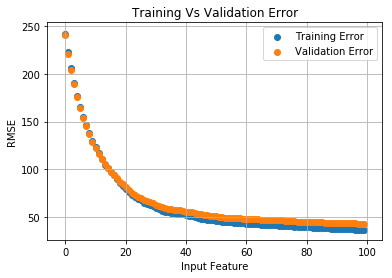

In [61]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()

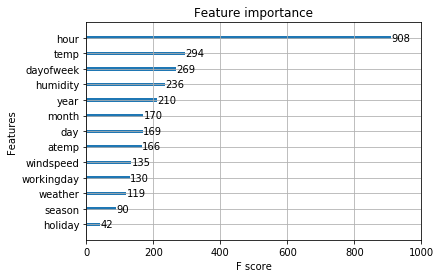

In [62]:
xgb.plot_importance(regressor)

In [63]:
df = pd.read_csv('bike_all.csv')

In [64]:
df.head()

count  season  holiday  workingday  weather  temp   atemp  humidity  \
0     16       1        0           0        1  9.84  14.395        81   
1     40       1        0           0        1  9.02  13.635        80   
2     32       1        0           0        1  9.02  13.635        80   
3     13       1        0           0        1  9.84  14.395        75   
4      1       1        0           0        1  9.84  14.395        75   

   windspeed  year  month  day  dayofweek  hour  
0        0.0  2011      1    1          5     0  
1        0.0  2011      1    1          5     1  
2        0.0  2011      1    1          5     2  
3        0.0  2011      1    1          5     3  
4        0.0  2011      1    1          5     4

In [65]:
X_test = df.iloc[:,1:]
print(X_test[:5])

   season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   year  month  day  dayofweek  hour  
0  2011      1    1          5     0  
1  2011      1    1          5     1  
2  2011      1    1          5     2  
3  2011      1    1          5     3  
4  2011      1    1          5     4  


In [66]:
result = regressor.predict(X_test)

In [67]:
result[:5]

array([32.89392  , 35.87318  , 26.616594 ,  7.4038415, -3.2827568],
      dtype=float32)

In [68]:
df['count_predicted'] = result

In [69]:
df.head()

count  season  holiday  workingday  weather  temp   atemp  humidity  \
0     16       1        0           0        1  9.84  14.395        81   
1     40       1        0           0        1  9.02  13.635        80   
2     32       1        0           0        1  9.02  13.635        80   
3     13       1        0           0        1  9.84  14.395        75   
4      1       1        0           0        1  9.84  14.395        75   

   windspeed  year  month  day  dayofweek  hour  count_predicted  
0        0.0  2011      1    1          5     0        32.893921  
1        0.0  2011      1    1          5     1        35.873180  
2        0.0  2011      1    1          5     2        26.616594  
3        0.0  2011      1    1          5     3         7.403841  
4        0.0  2011      1    1          5     4        -3.282757

In [70]:
# Negative Values are predicted
df['count_predicted'].describe()

count    10886.000000
mean       191.312378
std        171.435974
min        -69.783882
25%         41.953001
50%        152.628525
75%        286.643951
max        868.469849
Name: count_predicted, dtype: float64

In [71]:
df[df['count_predicted'] < 0]

count  season  holiday  workingday  weather   temp   atemp  humidity  \
4          1       1        0           0        1   9.84  14.395        75   
5          1       1        0           0        2   9.84  12.880        75   
6          2       1        0           0        1   9.02  13.635        80   
7          3       1        0           0        1   8.20  12.880        86   
18        35       1        0           0        3  17.22  21.210        88   
19        37       1        0           0        3  17.22  21.210        88   
28         3       1        0           0        2  18.86  22.725        94   
29         2       1        0           0        3  17.22  21.210        77   
30         1       1        0           0        2  16.40  20.455        76   
44        31       1        0           0        1  10.66  11.365        44   
45         9       1        0           0        1   9.84  10.605        44   
46         8       1        0           0        1   9.02  11.365        47   
48         2       1        0           1        1   8.20   8.335        44   
49         1       1        0           1        1   6.56   6.820        47   
70         2       1        0           1        1   6.56   9.090        59   
71         1       1        0           1        1   5.74   7.575        63   
72         2       1        0           1        1   5.74   9.090        63   
73         4       1        0           1        1   4.92   7.575        68   
93         6       1        0           1        1   6.56   9.850        74   
94         2       1        0           1        1   6.56   9.850        74   
95         2       1        0           1        1   9.84  11.365        48   
116        4       1        0           1        1   6.56  11.365        64   
117        2       1        0           1        1   6.56  11.365        64   
118        1       1        0           1        2   6.56   9.850        64   
139        7       1        0           1        2   8.20   9.850        69   
140        1       1        0           1        2   8.20   9.850        69   
141        1       1        0           1        2   8.20  10.605        69   
142        5       1        0           1        3   9.02  13.635        55   
165        1       1        0           0        3   7.38   9.850        55   
166        5       1        0           0        2   6.56   8.335        74   
...      ...     ...      ...         ...      ...    ...     ...       ...   
6166       2       1        0           1        1   4.92   8.335        54   
6408       5       1        0           0        2  12.30  13.635        52   
6524      11       1        0           1        3  19.68  23.485        77   
6526       1       1        0           1        3  16.40  20.455        66   
6619       1       1        0           1        3  21.32  25.000        72   
6620       2       1        0           1        3  21.32  25.000        72   
7363      16       2        0           0        3  21.32  25.000        83   
7364      11       2        0           0        3  21.32  25.000        83   
7365      17       2        0           0        3  21.32  25.000        83   
7433       1       2        0           1        3  22.96  26.515        88   
7434       2       2        0           1        3  22.96  26.515        88   
7435       5       2        0           1        3  22.96  26.515        88   
7578       6       2        0           1        3  23.78  27.275        83   
7579       5       2        0           1        3  22.96  26.515        94   
7963       4       2        0           1        3  24.60  27.275        88   
8106       4       2        0           1        2  21.32  25.000        83   
8323      13       3        0           0        1  31.98  37.880        66   
8324       6       3        0           0        1  31.98  37.120        62   
8325      21       3        0           0        1  31.98

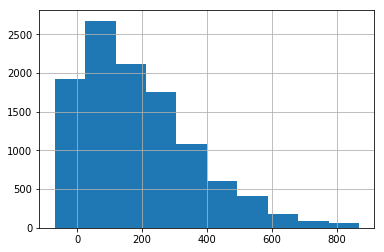

In [72]:
df['count_predicted'].hist()

In [73]:
def adjust_count(x):
    if x < 0:
        return 0
    else:
        return x

In [74]:
df['count_predicted'] = df['count_predicted'].map(adjust_count)

In [75]:
df[df['count_predicted'] < 0]

Empty DataFrame
Columns: [count, season, holiday, workingday, weather, temp, atemp, humidity, windspeed, year, month, day, dayofweek, hour, count_predicted]
Index: []

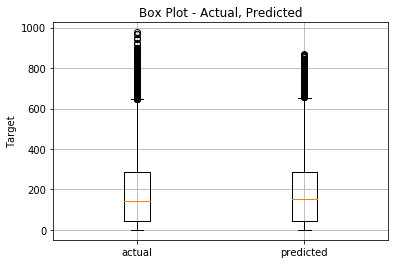

In [76]:
plt.boxplot([df['count'],df['count_predicted']], labels=['actual','predicted'])
plt.title('Box Plot - Actual, Predicted')
plt.ylabel('Target')
plt.grid(True)

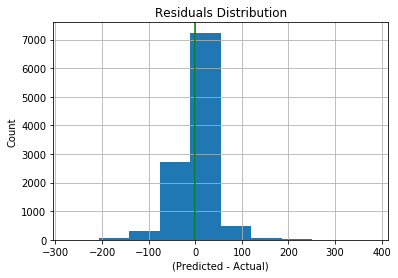

In [77]:
# Over prediction and Under Prediction needs to be balanced
# Training Data Residuals
residuals = (df['count_predicted'] - df['count'])

plt.hist(residuals)
plt.grid(True)
plt.xlabel('(Predicted - Actual)')
plt.ylabel('Count')
plt.title('Residuals Distribution')
plt.axvline(color='g')


In [78]:
import sklearn.metrics as metrics
print("RMSE: {0}".format(metrics.mean_squared_error(df['count'],df['count_predicted'])**.5))

RMSE: 38.4592770007648


In [79]:
# Metric Use By Kaggle
def compute_rmsle(y_true, y_pred):
    if type(y_true) != np.ndarray:
        y_true = np.array(y_true)
        
    if type(y_pred) != np.ndarray:
        y_pred = np.array(y_pred)
     
    return(np.average((np.log1p(y_pred) - np.log1p(y_true))**2)**.5)

In [80]:
print("RMSLE: {0}".format(compute_rmsle(df['count'],df['count_predicted'])))

RMSLE: 0.4702600891438421


In [81]:
# Prepare Data for Submission to Kaggle
df_test = pd.read_csv(test_file,parse_dates=['datetime'])

In [82]:
df_test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  year  month  day  dayofweek  hour  
0        56    26.0027  2011      1   20          3     0  
1        56     0.0000  2011      1   20          3     1  
2        56     0.0000  2011      1   20          3     2  
3        56    11.0014  2011      1   20          3     3  
4        56    11.0014  2011      1   20          3     4

In [83]:
X_test =  df_test.iloc[:,1:] # Exclude datetime for prediction

In [84]:
X_test.head()

season  holiday  workingday  weather   temp   atemp  humidity  windspeed  \
0       1        0           1        1  10.66  11.365        56    26.0027   
1       1        0           1        1  10.66  13.635        56     0.0000   
2       1        0           1        1  10.66  13.635        56     0.0000   
3       1        0           1        1  10.66  12.880        56    11.0014   
4       1        0           1        1  10.66  12.880        56    11.0014   

   year  month  day  dayofweek  hour  
0  2011      1   20          3     0  
1  2011      1   20          3     1  
2  2011      1   20          3     2  
3  2011      1   20          3     3  
4  2011      1   20          3     4

In [85]:
result = regressor.predict(X_test)

In [86]:
result[:5]

array([11.362558 , -0.7155521, -4.781685 , -4.620646 , -4.620646 ],
      dtype=float32)

In [87]:
df_test["count"] = result

In [88]:
df_test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  year  month  day  dayofweek  hour      count  
0        56    26.0027  2011      1   20          3     0  11.362558  
1        56     0.0000  2011      1   20          3     1  -0.715552  
2        56     0.0000  2011      1   20          3     2  -4.781685  
3        56    11.0014  2011      1   20          3     3  -4.620646  
4        56    11.0014  2011      1   20          3     4  -4.620646

In [89]:
df_test[df_test["count"] < 0]

datetime  season  holiday  workingday  weather   temp   atemp  \
1    2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2    2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3    2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4    2011-01-20 04:00:00       1        0           1        1  10.66  12.880   
25   2011-01-21 01:00:00       1        0           1        2   9.84  11.365   
26   2011-01-21 02:00:00       1        0           1        3   9.84  12.120   
27   2011-01-21 03:00:00       1        0           1        3   9.02  10.605   
28   2011-01-21 04:00:00       1        0           1        2   9.02  12.880   
52   2011-01-22 04:00:00       1        0           0        2   0.82   0.760   
53   2011-01-22 06:00:00       1        0           0        2   0.82   1.515   
54   2011-01-22 07:00:00       1        0           0        1   0.82   0.760   
55   2011-01-22 08:00:00       1        0           0        1   0.82   0.000   
75   2011-01-23 05:00:00       1        0           0        2   1.64   3.790   
76   2011-01-23 06:00:00       1        0           0        2   1.64   3.790   
77   2011-01-23 07:00:00       1        0           0        1   3.28   5.305   
78   2011-01-23 08:00:00       1        0           0        1   2.46   3.790   
91   2011-01-23 21:00:00       1        0           0        1   4.10   5.305   
92   2011-01-23 22:00:00       1        0           0        1   3.28   4.545   
93   2011-01-23 23:00:00       1        0           0        1   2.46   3.030   
95   2011-01-24 01:00:00       1        0           1        1   1.64   2.275   
96   2011-01-24 03:00:00       1        0           1        1   1.64   1.515   
97   2011-01-24 04:00:00       1        0           1        1   0.82   3.030   
98   2011-01-24 05:00:00       1        0           1        1   0.82   3.030   
118  2011-01-25 01:00:00       1        0           1        2   6.56   8.335   
119  2011-01-25 02:00:00       1        0           1        1   6.56   7.575   
120  2011-01-25 04:00:00       1        0           1        1   5.74   8.335   
141  2011-01-26 01:00:00       1        0           1        2   9.84  12.120   
142  2011-01-26 02:00:00       1        0           1        3   9.02  11.365   
143  2011-01-26 05:00:00       1        0           1        3   8.20   9.090   
148  2011-01-26 10:00:00       1        0           1        3   9.02  10.605   
...                  ...     ...      ...         ...      ...    ...     ...   
4110 2012-04-23 02:00:00       2        0           1        2  13.12  15.150   
4112 2012-04-23 04:00:00       2        0           1        3  12.30  14.395   
4113 2012-04-23 05:00:00       2        0           1        3  12.30  14.395   
4324 2012-05-21 00:00:00       2        0           1        3  23.78  27.275   
4325 2012-05-21 01:00:00       2        0           1        3  23.78  27.275   
4326 2012-05-21 02:00:00       2        0           1        3  22.96  26.515   
4327 2012-05-21 03:00:00       2        0           1        2  22.96  26.515   
4328 2012-05-21 04:00:00       2        0           1        3  22.96  26.515   
4329 2012-05-21 05:00:00       2        0           1        3  22.96  26.515   
4376 2012-05-23 04:00:00       2        0           1        3  23.78  27.275   
4542 2012-05-30 02:00:00       2        0           1        3  25.42  27.275   
4543 2012-05-30 03:00:00       2        0           1        3  25.42  28.030   
4926 2012-07-23 02:00:00       3        0           1        2  27.06  29.545   
4927 2012-07-23 03:00:00       3        0           1        2  27.06  29.545   
4928 2012-07-23 04:00:00       3        0           1        2  27.06  29.545   
5144 2012-08-20 04:00:00       3        0           1        2  24.60  28.030   
5621 2012-09-28 01:00:00       4        0           1        3  24.60  27.275   
5622 2012-09-28 02:00:00       4        0      

In [90]:
df_test["count"] = df_test["count"].map(adjust_count)

In [91]:
df_test[['datetime','count']].to_csv('predicted_count.csv',index=False)

In [ ]:
# RMSLE (Kaggle) Scores
# Test 1: 1.32
# Test 2 (added new feature): 0.61646